In [1]:
%matplotlib inline
import numpy as np
import matplotlib.tri as Tri
from netCDF4 import Dataset as NetCDFFile 
import netCDF4
from netCDF4 import num2date, date2num, date2index
import datetime as dt
import pandas as pd
from StringIO import StringIO
import xarray as xr
from scipy import stats
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import seaborn as sns
from datetime import datetime


/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## Install File


In [2]:
nameCSV = 'innis_1.csv'
df = pd.read_csv(str(nameCSV), sep=r'\s+', engine='c', header=0, na_filter=False, \
                               dtype=np.float, low_memory=False)

data = df.sort_values(by=['tt'])

lat = data.values[:,0]
lon = data.values[:,1]
wh = data.values[:,2]
tt = data.values[:,3]
qc = data.values[:,4]
back =data.values[:,5]
ws = data.values[:,6]
len(lat)

2662

## Calculate mean value of each satellite track 

In [3]:
days = [] #daystart
for k in range(len(tt)):
       
    t1 = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
    if k == 0: #get day 0. Then else: every day after that
        days.append(0)
        dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
        it = 0
    else:
        if t1.day != dd.day: #if day 1 is not equal to day 2, then append
            #print dd.day,t1.day
            days.append(k)
            it += 1
            dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
            
            
print 'Number of Satellite Tracks:', len(tt[days])

Number of Satellite Tracks: 2394


## Make ndarray(alltime) and list(days2) that has dates

In [4]:
alltime = num2date(tt[:],u'days since 1985-01-01 00:00:00 UTC')

In [5]:
netCDF4.num2date(tt[days],u'days since 1985-01-01 00:00:00 UTC')

array([datetime.datetime(1985, 3, 31, 8, 13, 46, 832721),
       datetime.datetime(1985, 4, 5, 21, 26, 15, 503909),
       datetime.datetime(1985, 4, 8, 21, 35, 6, 187500), ...,
       datetime.datetime(2019, 2, 9, 1, 11, 43, 638834),
       datetime.datetime(2019, 2, 10, 13, 55, 59, 960156),
       datetime.datetime(2019, 2, 18, 23, 10, 14, 196875)], dtype=object)

In [6]:
for k in range(len(days)):
    print wh[days[k]], alltime[k]

2.1770000457763667 1985-03-31 08:13:46.832721
0.29100000858306885 1985-04-05 21:26:15.503909
2.1640000343322754 1985-04-08 21:35:06.187500
1.579800009727478 1985-04-23 09:53:29.146876
2.3106002807617188 1985-05-16 11:33:14.298438
0.4826667308807373 1985-07-30 16:49:35.815105
1.2717777490615845 1985-08-22 18:29:05.607639
0.4731818437576294 1985-09-14 20:08:44.546877
0.4109000265598297 1985-09-23 09:29:54.689844
2.001000165939331 1985-10-07 21:48:02.343750
1.241000056266785 1985-10-30 23:27:24.464844
1.731545329093933 1985-11-02 23:36:09.269886
1.1175554990768433 1985-11-08 12:48:30.101562
0.5516666769981384 1985-11-26 01:15:21.096897
0.7686000466346741 1986-01-11 04:33:36.420703
0.6541999578475952 1986-01-19 17:54:59.206250
1.075285792350769 1986-02-03 06:12:35.508371
1.744444489479065 1986-03-01 08:00:17.441840
2.001062393188477 1986-03-24 09:39:13.101562
2.3270528316497803 1986-04-16 11:18:06.899671
0.5181428790092468 1986-05-09 12:56:55.488838
2.768230676651001 1986-06-01 14:35:32.74

1.3243684768676758 1996-02-22 22:41:35.343751
1.5657500028610232 1996-03-02 07:55:45.770400
3.0668947696685787 1996-03-03 20:40:03.296875
1.4186842441558838 1996-03-05 12:49:53.316840
1.268842339515686 1996-03-08 00:30:53.771097
0.6948235630989075 1996-03-12 05:54:16.557883
0.5914737582206726 1996-03-13 18:38:34.848684
0.4670000076293945 1996-03-22 03:52:48.445898
1.6347368955612185 1996-03-23 16:37:07.139803
1.757000207901001 1996-04-01 01:51:19.921978
1.2601176500320437 1996-04-02 14:35:38.198190
1.5905790328979492 1996-04-09 12:49:53.228401
1.2076842784881592 1996-04-10 23:49:52.219573
2.811473846435547 1996-04-12 00:30:50.472703
1.6571054458618164 1996-04-12 12:34:10.052632
1.1795001029968262 1996-04-20 21:48:23.094573
1.8774707317352293 1996-04-22 10:32:41.743421
0.5340000391006471 1996-04-28 00:28:04.767061
1.3971501588821411 1996-04-30 19:46:54.587993
2.328789472579956 1996-05-02 08:31:12.606085
2.45169997215271 1996-05-10 17:45:26.541119
2.3263225555419917 1996-05-12 06:29:44.7

2.0430669784545903 2006-08-18 00:00:54.417200
1.9818824529647827 2006-09-02 23:57:59.757293
1.9084213658383016 2006-09-03 12:22:40.722656
1.762800216674805 2006-09-19 12:19:49.517186
1.4685715436935425 2006-09-22 00:00:51.603955
1.934733510017395 2006-10-07 23:58:01.374023
1.2753334045410156 2006-10-08 12:22:43.130681
0.9359523228236608 2006-10-22 04:10:53.951824
1.9719003677368163 2006-10-24 12:19:53.981772
0.7619999885559082 2006-11-08 05:23:39.460158
0.4420000314712525 2006-11-11 23:58:01.458985
0.5638571977615356 2006-11-12 12:22:42.572916
0.6654999852180481 2006-11-25 06:36:32.129464
1.6003999710083008 2006-12-01 00:00:55.219939
1.7961502075195312 2006-12-12 07:49:21.636719
1.0992000102996826 2006-12-16 23:58:00.768556
2.4275001525878905 2006-12-17 12:22:41.869791
1.3860667943954468 2006-12-29 09:02:17.511160
1.7522500991821288 2007-01-02 12:19:49.475586
1.675400161743164 2007-01-05 00:00:50.544575
1.1878000259399415 2007-01-15 10:15:09.812499
0.999353051185608 2007-01-20 23:57:54

3.1687503814697267 2016-06-04 04:46:04.693014
2.57345027923584 2016-06-09 16:24:04.726563
1.2662500143051147 2016-06-10 23:59:58.499998
0.9575501441955566 2016-06-11 00:00:07
1.434500026702881 2016-06-12 07:34:43.845312
0.9557856832231794 2016-06-12 07:36:04.671875
1.174375057220459 2016-06-13 20:19:02.550000
0.7162353291231043 2016-06-13 20:20:22.906250
0.7533000946044922 2016-06-19 12:20:14
0.7560000419616699 2016-06-22 05:33:15.656836
0.5809524172828311 2016-06-22 05:34:37.039648
0.7666500568389892 2016-06-23 18:17:34.264843
1.6775236583891369 2016-06-23 18:18:55.501562
0.7975001335144043 2016-07-01 03:23:33.525065
1.1394500732421875 2016-07-02 06:52:10.003552
0.8180000080781824 2016-07-02 14:02:55.389789
0.3633333524068197 2016-07-03 16:16:06.460070
0.5963889757792155 2016-07-03 16:17:31.361779
0.7477500438690186 2016-07-06 15:01:32.499080
0.6685293912887573 2016-07-07 23:59:58.999995
0.7196500301361084 2016-07-08 00:00:07.500000
0.4909474222283614 2016-07-08 14:58:58.531253
1.4070

In [7]:
days2 = [] #daystart
for k in range(len(alltime)):
       
    t1 = alltime[k]
    if k == 0: #get day 0. Then else: every day after that
        days2.append(alltime[k])
        dd =alltime[k]
        it = 0
    else:
        if t1.day != dd.day: #if day 1 is not equal to day 2, then append
            #print dd.day,t1.day
            days2.append(alltime[k])
            it += 1
            dd = alltime[k]
            
            
print 'Number of Satellite Tracks:', len(days2)

Number of Satellite Tracks: 2394


In [8]:
days2

[datetime.datetime(1985, 3, 31, 8, 13, 46, 832721),
 datetime.datetime(1985, 4, 5, 21, 26, 15, 503909),
 datetime.datetime(1985, 4, 8, 21, 35, 6, 187500),
 datetime.datetime(1985, 4, 23, 9, 53, 29, 146876),
 datetime.datetime(1985, 5, 16, 11, 33, 14, 298438),
 datetime.datetime(1985, 7, 30, 16, 49, 35, 815105),
 datetime.datetime(1985, 8, 22, 18, 29, 5, 607639),
 datetime.datetime(1985, 9, 14, 20, 8, 44, 546877),
 datetime.datetime(1985, 9, 23, 9, 29, 54, 689844),
 datetime.datetime(1985, 10, 7, 21, 48, 2, 343750),
 datetime.datetime(1985, 10, 30, 23, 27, 24, 464844),
 datetime.datetime(1985, 11, 2, 23, 36, 9, 269886),
 datetime.datetime(1985, 11, 8, 12, 48, 30, 101562),
 datetime.datetime(1985, 11, 26, 1, 15, 21, 96897),
 datetime.datetime(1986, 1, 11, 4, 33, 36, 420703),
 datetime.datetime(1986, 1, 19, 17, 54, 59, 206250),
 datetime.datetime(1986, 2, 3, 6, 12, 35, 508371),
 datetime.datetime(1986, 3, 1, 8, 0, 17, 441840),
 datetime.datetime(1986, 3, 24, 9, 39, 13, 101562),
 datetime.

## WAVE PERIOD EQN

$ \epsilon = 3.25 \left( H_s^2 g^2/U^4 \right)^{0.31}$



In [9]:
def waveage(H, U, grav=9.80665):
    '''
    The pseudo wave age can be expressed in terms of significant wave height and surface wind speed.
    '''

    grav2 = grav**2
    hs2 = np.square(H) 
    u4 = np.power(U,4)
    tmp = np.divide(hs2*grav2,u4)
    eps = 3.25*np.power(tmp,0.31)
    
    return eps


def waveperiod(H, U, grav=9.80665):
    '''
    Wave age from GA-2, Govindan et al.
    '''

    eps = waveage(H, U, grav=9.80665)
    period = (((eps-(5.78))/(eps+(U/(H*((U/H)+H)))))+(H+(5.70)))
    
    return period

In [10]:
T = waveperiod(wh,ws)
print T
print len(T),len(wh)

[7.21842117 3.84835449 6.06049484 ... 5.92469211 6.59358157 5.14627429]
2662 2662


In [11]:
dayswh = wh[days] #wave height for each satellite pass
daysTz = T[days]

print len(dayswh)
print len(daysTz)

2394
2394


## Calculate Wave Power



### Total Wave Energy
$E = \frac{1}{8} \left(pgH_s^2\right) $


In [12]:
def totalwaveenergy(H):
    
    '''
    The total wave energy can be calculated using Hs, gravity and water density
    '''
    
    x = 1./8.
    p = 1025. #sea water density, kg/m^3
    g = 9.80665
    h2 = np.square(H) 
    
    pgh = p*g*h2
    
    e = x*pgh
    
    return e

In [13]:
we = totalwaveenergy(wh)

In [14]:
we

array([5954.85828247,  106.39973776, 5883.95145043, ..., 6377.57462625,
       1880.42510514, 1720.57967131])

### Wave energy speed / Wave Velocity
$Cg = \frac{gTz}{2\pi}n$


In [15]:
import math
def wavespeed(T):
    '''
    Wave group speed
    '''
    
    g =9.80665
    ts = T #wave period
    pi = 2*math.pi
    n=0.5
    
    top = g*ts
    
    Cg = n *(np.divide(top,pi))
    
    return Cg
    

In [16]:
Cg = wavespeed(T)
Cg

array([5.63317223, 3.00321124, 4.72953994, ..., 4.62356107, 5.14555464,
       4.01609282])

### Wave Energy Flux
$P = ECg$

In [17]:
def waveenergyflux(H,T):
    '''
    The rate at which energy is carried by waves, determined using total wave energy and wave energy speed
    '''
    
    e = totalwaveenergy(H)
    Cg = wavespeed(T)
    y = 0.001
    P = e * Cg*y
    
    return P
    
    

In [18]:
power1 = waveenergyflux(wh,T)
power1

array([33.5447423 ,  0.31954089, 27.82838339, ..., 29.48710573,
        9.67583013,  6.91000766])

In [19]:
pp = power1[days]

In [20]:
print pp.shape, power1.shape, 'therefore use pp in df'

(2394,) (2662,) therefore use pp in df


In [21]:
print dayswh.shape
print daysTz.shape

(2394,)
(2394,)


In [22]:
df = pd.DataFrame(data={"date": days2, "wh":dayswh, "period":daysTz, "power":pp})
df.to_csv("innis_timeseries.csv", sep=',',index=False)
df

,date,period,power,wh
0,1985-03-31 08:13:46.832721,7.218421,33.544742,2.177000
1,1985-04-05 21:26:15.503909,3.848354,0.319541,0.291000
2,1985-04-08 21:35:06.187500,6.060495,27.828383,2.164000
3,1985-04-23 09:53:29.146876,4.812704,11.777651,1.579800
4,1985-05-16 11:33:14.298438,5.343270,27.971910,2.310600
5,1985-07-30 16:49:35.815105,4.298772,0.981984,0.482667
6,1985-08-22 18:29:05.607639,6.605341,10.475701,1.271778
7,1985-09-14 20:08:44.546877,3.655896,0.802630,0.473182
8,1985-09-23 09:29:54.689844,3.871910,0.641007,0.410900
9,1985-10-07 21:48:02.343750,5.364824,21.062751,2.001000


In [23]:
df99 = pd.DataFrame(data={"date": days2, "wh":dayswh})
df99.to_csv("innis_wh_long.csv", sep=',',index=False)
df99

,date,wh
0,1985-03-31 08:13:46.832721,2.177000
1,1985-04-05 21:26:15.503909,0.291000
2,1985-04-08 21:35:06.187500,2.164000
3,1985-04-23 09:53:29.146876,1.579800
4,1985-05-16 11:33:14.298438,2.310600
5,1985-07-30 16:49:35.815105,0.482667
6,1985-08-22 18:29:05.607639,1.271778
7,1985-09-14 20:08:44.546877,0.473182
8,1985-09-23 09:29:54.689844,0.410900
9,1985-10-07 21:48:02.343750,2.001000


In [24]:
df[400:500]

,date,period,power,wh
400,1997-04-13 05:20:30.439829,5.320210,19.116470,1.914286
401,1997-04-14 09:39:34.628906,5.832970,27.781372,2.203938
402,1997-04-22 18:53:49.785157,5.822603,39.358608,2.625600
403,1997-04-24 07:38:07.876645,5.722450,30.139514,2.317632
404,1997-04-29 12:49:46.913604,5.819298,38.151707,2.585765
405,1997-05-02 00:30:48.761624,5.660149,20.054265,1.900889
406,1997-05-04 05:36:39.703125,6.011254,30.163126,2.262158
407,1997-05-12 14:50:56.120192,4.710454,5.151330,1.056077
408,1997-05-14 03:35:11.515419,4.938191,7.725890,1.263158
409,1997-05-18 05:25:50.917465,4.918468,4.951243,1.013233


In [25]:
print len(df.wh)
print len(df.date)
print len(df.power)

2394
2394
2394


## Get rolling average wh based on 30 Days

In [26]:
yrolling = df.rolling('30D', on = 'date', min_periods = 1).mean()

In [27]:
yrolling

,date,period,power,wh
0,1985-03-31 08:13:46.832721,7.218421,33.544742,2.177000
1,1985-04-05 21:26:15.503909,5.533388,16.932142,1.234000
2,1985-04-08 21:35:06.187500,5.709090,20.564222,1.544000
3,1985-04-23 09:53:29.146876,5.484994,18.367580,1.552950
4,1985-05-16 11:33:14.298438,5.077987,19.874781,1.945200
5,1985-07-30 16:49:35.815105,4.298772,0.981984,0.482667
6,1985-08-22 18:29:05.607639,5.452057,5.728842,0.877222
7,1985-09-14 20:08:44.546877,5.130619,5.639165,0.872480
8,1985-09-23 09:29:54.689844,3.763903,0.721819,0.442041
9,1985-10-07 21:48:02.343750,4.297543,7.502129,0.961694


In [28]:
wh_rolling=yrolling['wh']

period_rolling=yrolling['period']

power_rolling = yrolling['power']

## Incorporate rolling average wh into dataframe

In [29]:
df = pd.DataFrame(data={"date": days2, "wh":dayswh, "wh_rolling":wh_rolling, "period":daysTz, "period_rolling":period_rolling, "power":pp, "power_rolling":power_rolling })
df.to_csv("innis_timeseries.csv", sep=',',index=False)
df

,date,period,period_rolling,power,power_rolling,wh,wh_rolling
0,1985-03-31 08:13:46.832721,7.218421,7.218421,33.544742,33.544742,2.177000,2.177000
1,1985-04-05 21:26:15.503909,3.848354,5.533388,0.319541,16.932142,0.291000,1.234000
2,1985-04-08 21:35:06.187500,6.060495,5.709090,27.828383,20.564222,2.164000,1.544000
3,1985-04-23 09:53:29.146876,4.812704,5.484994,11.777651,18.367580,1.579800,1.552950
4,1985-05-16 11:33:14.298438,5.343270,5.077987,27.971910,19.874781,2.310600,1.945200
5,1985-07-30 16:49:35.815105,4.298772,4.298772,0.981984,0.981984,0.482667,0.482667
6,1985-08-22 18:29:05.607639,6.605341,5.452057,10.475701,5.728842,1.271778,0.877222
7,1985-09-14 20:08:44.546877,3.655896,5.130619,0.802630,5.639165,0.473182,0.872480
8,1985-09-23 09:29:54.689844,3.871910,3.763903,0.641007,0.721819,0.410900,0.442041
9,1985-10-07 21:48:02.343750,5.364824,4.297543,21.062751,7.502129,2.001000,0.961694


In [30]:
print df.date[52]
print df.date[53]

1988-08-01 11:40:58.989583
1992-10-21 07:43:04.942708


In [31]:
#Period normal    
time1 = df.period[0:52]
time2 = df.period[53:-1]

#Period rolling
tt1 = df.period_rolling[0:52]
tt2 = df.period_rolling[53:-1]
        


#Hs normal
y1 = df.wh[0:52]
y2 = df.wh[53:-1]

#Hs rolling
yy1 = df.wh_rolling[0:52]
yy2 = df.wh_rolling[53:-1]


#power normal
p1 = df.power[0:52]
p2=df.power[53:-1]

#power rolling
pp1 = df.power_rolling[0:52]
pp2 = df.power_rolling[53:-1]


#Date
x1=df.date[0:52]
x2 = df.date[53:-1]

/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


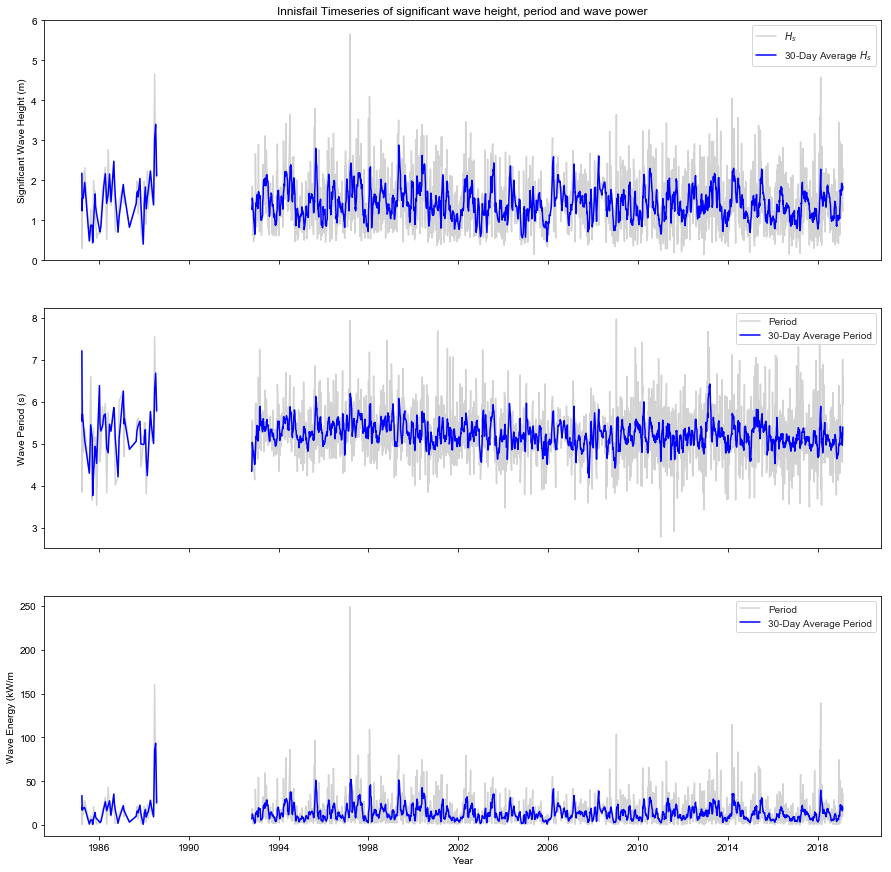

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex = True,figsize = (15,15))    

sns.set_style("white")
#fig.title("Innisfail 30 Day Moving Average Significant Wave Height")


#HS
#Before date break
ax1.plot(x1,y1,color='lightgrey',label="$H_s$")
ax1.plot(x1,yy1,color='blue',label="30-Day Average $H_s$")

#After date break
ax1.plot(x2,y2,color='lightgrey', label='False')
ax1.plot(x2,yy2,color='blue')

ax1.legend(labels=["$H_s$","30-Day Average $H_s$"], loc='upper right')
ax1.set_ylabel("Significant Wave Height (m)")
ax1.set_ylim(0,6)


#Wave Period 
#Before date break
ax2.plot(x1, time1, color='lightgrey')
ax2.plot(x1,tt1,color='blue')

#After date break
ax2.plot(x2,time2, color='lightgrey')
ax2.plot(x2,tt2,color='blue')

ax2.legend(labels=['Period',"30-Day Average Period"], loc='upper right')
ax2.set_ylabel("Wave Period (s)")


#Wave Power - Need to add data
#Before date break
ax3.plot(x1, p1,color='lightgrey')
ax3.plot(x1,pp1,color='blue')

#After date break
ax3.plot(x2,p2,color='lightgrey')
ax3.plot(x2,pp2,color='blue')

ax3.legend(labels=['Period',"30-Day Average Period"], loc='upper right')
ax3.set_ylabel("Wave Energy (kW/m") #Check if watts/metre is correct


#Formatting

plt.xlabel("Year")

#"years = pd.date_range(start='1985',end='2020', periods=10)
years = pd.date_range('2008','2015', freq='AS')
ax1.set_title('Innisfail Timeseries of significant wave height, period and wave power')
plt.savefig("Innisfail_timeseries")

In [33]:
for k in range(len(days)):
    if wh[k]>5:
        print wh[k], alltime[k]

5.654118061065674 1997-03-09 00:27:57.287942


In [34]:
for k in range(len(days)):
    if T[k]>7:
        print wh[k], alltime[k], T[k]

2.1770000457763667 1985-03-31 08:13:46.832721 7.218421169518095
4.651167392730713 1988-06-25 20:13:10.406247 7.55438930172712
1.054800033569336 1993-02-27 05:23:53.878907 7.251031320400107
5.654118061065674 1997-03-09 00:27:57.287942 7.947794289964777
3.821631908416748 1998-01-17 00:58:17.539165 7.188196055037728
1.1669999361038208 1998-10-31 14:15:35.536456 7.471015484727576
1.2774287462234497 1999-02-07 18:00:47.828125 7.115958779782
1.308000087738037 2001-01-30 01:28:51.349608 7.697298430607047
1.036428689956665 2001-07-07 17:05:04.417410 7.266594494628591
0.9443333745002748 2001-08-17 21:43:29.512151 7.071830458390569
0.8014000058174133 2001-10-04 22:51:43.678125 7.067503983548424
1.1776667833328247 2003-01-31 00:00:48.224201 7.242404809755702
3.6381582962839225 2009-01-13 08:17:04.857730 7.975708668017844
1.0576923076923077 2009-11-18 06:15:41.850413 7.295697236394595
1.2784287588936942 2010-03-07 07:59:33.872656 7.424756517792561
0.9838000615437824 2010-11-30 01:19:39.604837 7.03

## Seasonal Kendall Test

In [35]:
r = netCDF4.num2date(tt[days],u'days since 1985-01-01 00:00:00 UTC')

In [36]:
# use this to make year/month df

def getMeanH(month,year):
    valwh = []
    for k in range(len(days)):
        if r[k].year == year and r[k].month == month:
            valwh.append(wh[days[k]])

    return np.mean(valwh)


monthYear = []
for k in range(1,13):
    monthYear.append(getMeanH(k,2018))

print monthYear,
#     print alltime[k].year #,wh[days[k]]

[1.5542418268314449, 1.7217983282398392, 1.5468688456463842, 1.5310160962859816, 1.832533262756629, 1.6641820354911563, 1.1086525499793045, 1.1042811641816683, 1.3621249641233477, 0.8599115383400159, 1.147203009908888, 1.517231036341157]


In [41]:
nameCSV = 'innis_wh_date.csv'
no_nan = pd.read_csv(str(nameCSV))
no_nan.set_index('Date')

,Wh
Date,
19931,1.246717
19932,1.656081
19933,0.991064
19934,2.176583
19935,1.996667
19936,1.974246
19937,1.238238
19938,1.567897
19939,1.198661


In [42]:
import pymannkendall as mk
seasonal = mk.seasonal_test(no_nan, period=12)
seasonal

Seasonal_Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=10.380844483565529, Tau=0.27860911864127297, s=27034.0, var_s=6781458.666666667, slope=0.006047082044117651)

In [46]:
np.mean(df.period)

5.220216270455042

In [44]:
max(df.power)

249.1390066504754